## Inferential Statistics for Capstone 1: Sentiment Analysis of Amazon Products Reviews

### Code for statical analysis

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from scipy.stats import t
# Build figures inline
%matplotlib inline

In [2]:
#load pickled files to DataFrame
baby_products = pd.read_pickle('baby_products_stats.pkl')
grocery_foods = pd.read_pickle('grocery_foods_stats.pkl')
cell_phones = pd.read_pickle('cell_phones_stats.pkl')

### 1. Distribution of word count per review across the different star rated reviews

In [3]:
# baby_products distribution

rev_rating = baby_products[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['word_count'] = rev_rating_copy['reviewText'].apply(lambda x: len(x.split())) # count words per review

def caps(text):
    return np.mean([1 if i.isupper() else 0 for i in text]) * 100

rev_rating_copy['pct_capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_baby = rev_rating_copy[['rating', 'word_count', 'pct_capitals']]
rating_len_cap_baby.head(2)

,rating,word_count,pct_capitals
0,5,47,1.185771
1,5,105,0.899281


In [4]:
# Grocery_foods_Distribution

rev_rating = grocery_foods[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['word_count'] = rev_rating_copy['reviewText'].apply(lambda x: len(x.split())) # count words per review



rev_rating_copy['pct_capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_food = rev_rating_copy[['rating', 'word_count', 'pct_capitals']]
rating_len_cap_food.head(2)

,rating,word_count,pct_capitals
0,4,31,3.086420
1,3,114,1.543739


In [5]:
# Cell_phones_Distribution
rev_rating = cell_phones[['rating', 'reviewText']]

rev_rating_copy = rev_rating.copy()
rev_rating_copy['word_count'] = rev_rating_copy['reviewText'].apply(lambda x: len(x.split())) # count words per review


rev_rating_copy['pct_capitals']= rev_rating_copy['reviewText'].apply(caps) # % caps

rating_len_cap_phone = rev_rating_copy[['rating', 'word_count', 'pct_capitals']]
rating_len_cap_phone.head(2)

,rating,word_count,pct_capitals
0,4,37,2.645503
1,5,32,2.500000


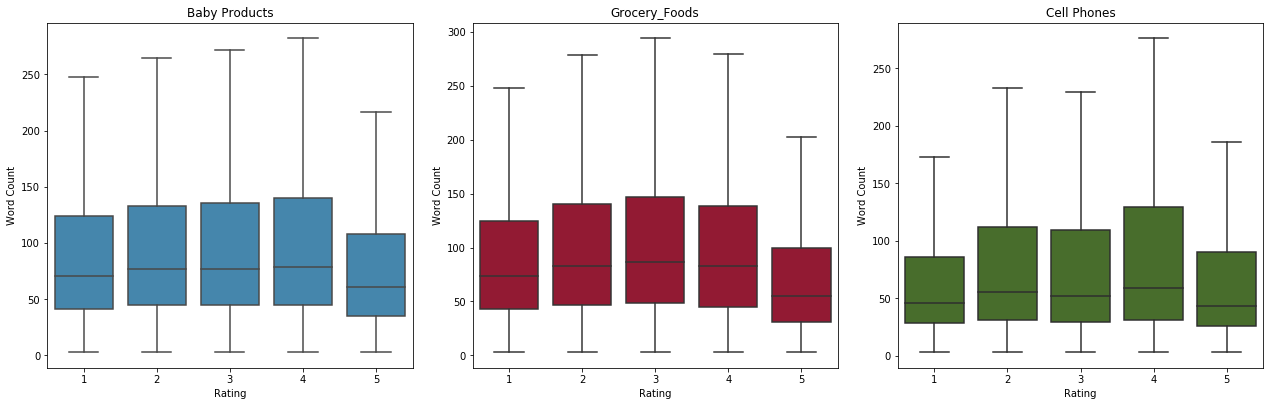

In [6]:
# rating and review length distribution
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); sns.boxplot(x = 'rating', y = 'word_count', data = rating_len_cap_baby, showfliers=False, color='#348ABD').set(xlabel= 'Rating', ylabel='Word Count', title='Baby Products')
plt.subplot(1,3,2); sns.boxplot(x = 'rating', y = 'word_count', data = rating_len_cap_food, showfliers=False, color='#A60628').set(xlabel= 'Rating', ylabel='Word Count', title='Grocery_Foods')
plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'word_count', data = rating_len_cap_phone, showfliers=False, color='#467821').set(xlabel= 'Rating', ylabel='Word Count', title='Cell Phones')
plt.tight_layout(pad=2)

From the above box plot we can see in all of the three product categories, five and one star rated reviews are found to be shorter than other three (2, 3,4) rated reviews.

####  Hypothesis Test:

- __Null Hypothesis__: The word counts for 5-star rated reviews and other rated reviews are same.

- __Alternate Hypothesis__: The word counts for 5-star rated reviews and other rated reviews are not same.


#### Category: Baby Products

In [7]:
# Create a new column called rating_category and divide the ratings into two groups 'five' and 'not5'(all other rating less than 5)
rating_len_cap_baby['rating_category'] = np.where(rating_len_cap_baby['rating'] == 5 , 'five', 'not5')
rating_len_cap_baby.head(2)

,rating,word_count,pct_capitals,rating_category
0,5,47,1.185771,five
1,5,105,0.899281,five


In [8]:
# Group the rating_category column and get descriptive stats (Baby_Products)

rating_group_baby = rating_len_cap_baby['word_count'].groupby(rating_len_cap_baby['rating_category'])
rating_group_baby.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,93440.0,89.347410,95.477899,3.0,35.0,61.0,108.0,2352.0
not5,67222.0,112.061096,116.950956,3.0,45.0,77.0,136.0,3855.0


In [9]:
# create array for two different rating category
rating_5_baby = rating_len_cap_baby.word_count[rating_len_cap_baby.rating_category == 'five']  
rating_not5_baby = rating_len_cap_baby.word_count[rating_len_cap_baby.rating_category == 'not5'] 

# perform hypothesis test with two-sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(rating_not5_baby,rating_5_baby, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 41.398
P-value of test 0.000


#### Category: Grocery_Foods



In [10]:
# Create a new column called rating_category and divide the ratings into two groups 'five' and 'not5'(all other rating less than 5)
rating_len_cap_food['rating_category'] = np.where(rating_len_cap_food['rating'] == 5 , 'five', 'not5')
rating_len_cap_food.head(2)

,rating,word_count,pct_capitals,rating_category
0,4,31,3.086420,not5
1,3,114,1.543739,not5


In [11]:
# Group the rating_category column and get descriptive stats (Baby_Products)

rating_group_food = rating_len_cap_food['word_count'].groupby(rating_len_cap_food['rating_category'])
rating_group_food.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,87298.0,81.111400,84.416838,3.0,31.0,55.0,100.0,4693.0
not5,63756.0,109.782609,100.297569,3.0,46.0,83.0,140.0,3368.0


In [12]:
# create array for two different rating category
rating_5_food = rating_len_cap_food.word_count[rating_len_cap_food.rating_category == 'five']  
rating_not5_food = rating_len_cap_food.word_count[rating_len_cap_food.rating_category == 'not5'] 

# perform hypothesis test with two-sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(rating_not5_food,rating_5_food, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 58.596
P-value of test 0.000


#### Category: Cell Phones

In [13]:
# Create a new column called rating_category and divide the ratings into two groups 'five' and 'not5'(all other rating less than 5)
rating_len_cap_phone['rating_category'] = np.where(rating_len_cap_phone['rating'] == 5 , 'five', 'not5')
rating_len_cap_phone.head(2)

,rating,word_count,pct_capitals,rating_category
0,4,37,2.645503,not5
1,5,32,2.500000,five


In [14]:
# Group the rating_category column and get descriptive stats (Baby_Products)

rating_group_phone = rating_len_cap_phone['word_count'].groupby(rating_len_cap_phone['rating_category'])
rating_group_phone.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,108281.0,85.306841,131.686613,3.0,26.0,43.0,90.0,5263.0
not5,85595.0,100.125533,138.566473,3.0,30.0,54.0,114.0,4105.0


In [15]:
# create array for two different rating category
rating_5_phone = rating_len_cap_phone.word_count[rating_len_cap_phone.rating_category == 'five']  
rating_not5_phone = rating_len_cap_phone.word_count[rating_len_cap_phone.rating_category == 'not5'] 

# perform hypothesis test with two-sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(rating_not5_phone,rating_5_phone, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 23.899
P-value of test 0.000


__In all the three product categories, since p_value is less than 0.05 we reject the null hypothesis and conclude that the word counts for 5-star rated reviews and other rated reviews are not same.__



### 2. Distribution of the percentage of uppercase letters in different star rated reviews


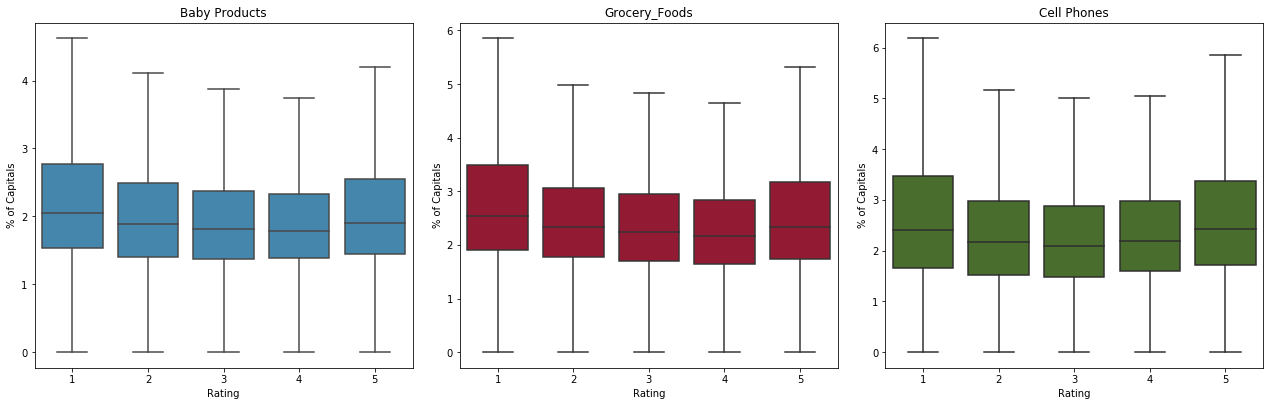

In [16]:
# Rating and % caps distribution 
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);sns.boxplot(x = 'rating', y = 'pct_capitals', data = rating_len_cap_baby, showfliers=False, color='#348ABD').set(xlabel= 'Rating',ylabel='% of Capitals', title='Baby Products')

plt.subplot(1,3,2);sns.boxplot(x = 'rating', y = 'pct_capitals', data = rating_len_cap_food, showfliers=False,color='#A60628').set(xlabel= 'Rating',ylabel='% of Capitals',title='Grocery_Foods')

plt.subplot(1,3,3);sns.boxplot(x = 'rating', y = 'pct_capitals', data = rating_len_cap_phone, showfliers=False, color='#467821').set(xlabel= 'Rating',ylabel='% of Capitals',title='Cell Phones')
plt.tight_layout(pad=2)

From the above distribution of percentage of uppercase letters across different star rated reviews we can see that in all the three product categories, reviews corresponding to 1-star and 5-star ratings have more uppercase letters and three star rated reviews have least upper case letters. 

####  Hypothesis Test:

- __Null Hypothesis__: The % of capitals for 5-star rated reviews are same as other rated reviews.

- __Alternate Hypothesis__: The % of capitals for 5-star rated reviews are different from the other rated reviews.

#### Category: Baby Products

In [17]:
# Group the rating_category column and get descriptive stats (Baby_Products)

caps_group_baby = rating_len_cap_baby['pct_capitals'].groupby(rating_len_cap_baby['rating_category'])
caps_group_baby.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,93440.0,2.306988,3.728225,0.0,1.449275,1.908397,2.550614,84.920635
not5,67222.0,2.110268,2.769277,0.0,1.395349,1.831502,2.409639,81.578947


In [18]:
# create array for two different rating category
caps_5_baby = rating_len_cap_baby.pct_capitals[rating_len_cap_baby.rating_category == 'five']  
caps_not5_baby = rating_len_cap_baby.pct_capitals[rating_len_cap_baby.rating_category == 'not5'] 


# perform hypothesis test with two_sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(caps_5_baby,caps_not5_baby, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 12.134
P-value of test 0.000


In [19]:
# create array for two different rating category
caps_5_baby = rating_len_cap_baby[rating_len_cap_baby['rating'].apply(lambda x: x==5)]['pct_capitals']
caps_not5_baby = rating_len_cap_baby[rating_len_cap_baby['rating'].apply(lambda x: x<5)]['pct_capitals'] 


# perform hypothesis test with two_sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(caps_5_baby,caps_not5_baby, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 12.134
P-value of test 0.000


#### Category: Grocery_Foods

In [20]:
# Group the rating_category column and get descriptive stats 

caps_group_food = rating_len_cap_food['pct_capitals'].groupby(rating_len_cap_food['rating_category'])
caps_group_food.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,87298.0,3.173263,6.338022,0.0,1.739130,2.336449,3.174603,85.714286
not5,63756.0,2.789491,4.640589,0.0,1.694915,2.232143,2.957334,82.812500


In [21]:
# create array for two different rating category
caps_5_food = rating_len_cap_food.pct_capitals[rating_len_cap_food.rating_category == 'five']  
caps_not5_food = rating_len_cap_food.pct_capitals[rating_len_cap_food.rating_category == 'not5'] 


# perform hypothesis test with two_sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(caps_5_food,caps_not5_food, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 13.586
P-value of test 0.000


#### Category: Cell Phones

In [22]:
# Group the rating_category column and get descriptive stats 

caps_group_phone = rating_len_cap_phone['pct_capitals'].groupby(rating_len_cap_phone['rating_category'])
caps_group_phone.describe()

,count,mean,std,min,25%,50%,75%,max
rating_category,,,,,,,,
five,108281.0,3.311927,6.792742,0.0,1.712329,2.429150,3.370787,86.111111
not5,85595.0,2.950758,6.107330,0.0,1.562500,2.189781,3.028909,88.461538


In [23]:
# create array for two different rating category
caps_5_phone = rating_len_cap_phone.pct_capitals[rating_len_cap_phone.rating_category == 'five']  
caps_not5_phone = rating_len_cap_phone.pct_capitals[rating_len_cap_phone.rating_category == 'not5'] 


# perform hypothesis test with two_sided independent t-test for unequal variances

tstat, p_value = scipy.stats.ttest_ind(caps_5_phone,caps_not5_phone, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))

Tests statistic 12.302
P-value of test 0.000


__In all of the three product categories, since p_value is less than 0.05 we reject the null hypothesis and conclude that the % of capitals for 5-star rated reviews are different from the other rated reviews.__

### 3. Compare the higher percentage of uppercase letters (>60%) in different star rated reviews

For all the three product categories the % of capitals show bimodal distribution one peak centered at around 20% and the other peak centered at around 70% of capitals. Here we are comparing the greater than 60% uppercase letters in different star rated reviews.


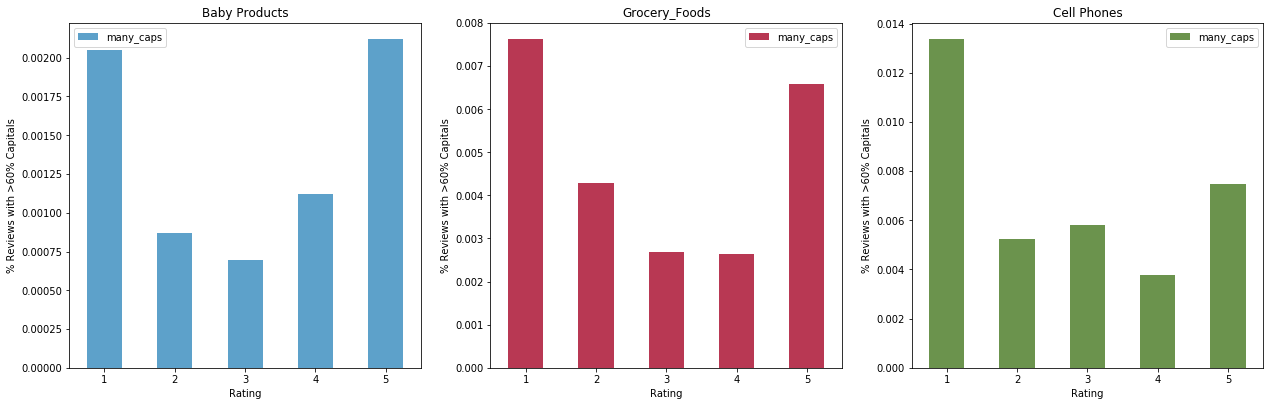

In [24]:
# Distribution of % caps(>60%) vs ratings
rating_len_cap_baby['many_caps'] = rating_len_cap_baby['pct_capitals'].apply(lambda x: x >= 60)
rating_len_cap_food['many_caps'] = rating_len_cap_food['pct_capitals'].apply(lambda x: x >= 60)
rating_len_cap_phone['many_caps'] = rating_len_cap_phone['pct_capitals'].apply(lambda x: x >= 60)

baby_caps = rating_len_cap_baby[['rating','many_caps']].groupby('rating').mean()
food_caps = rating_len_cap_food[['rating','many_caps']].groupby('rating').mean()
phone_caps = rating_len_cap_phone[['rating','many_caps']].groupby('rating').mean()


fig, axes = plt.subplots(1, 3, figsize= (18,6))

baby_caps.plot(kind='bar', ax=axes[0], color='#348ABD',rot = 0, alpha=0.8).set(xlabel='Rating', ylabel='% Reviews with >60% Capitals')
food_caps.plot(kind='bar', ax=axes[1], color='#A60628',rot = 0, alpha=0.8).set(xlabel='Rating', ylabel='% Reviews with >60% Capitals')
phone_caps.plot(kind='bar', ax=axes[2], color='#467821',rot = 0, alpha=0.8).set(xlabel='Rating',ylabel='% Reviews with >60% Capitals')

axes[0].set_title('Baby Products')
axes[1].set_title('Grocery_Foods')
axes[2].set_title('Cell Phones')
plt.tight_layout(pad=2.0)

From the above distribution, we can see 1 and 5 star reviews are more likely to contain >= 60% capital letters across product categories than other star ratings. 

####  Hypothesis Test:

- __Null Hypothesis__: There is no difference between the  high % of capitals (>= 60%) for 5-star and other rated reviews.

- __Alternate Hypothesis__: There is a difference between the  high % of capitals (>= 60%) for 5-star and other rated reviews.

#### Category: Baby Products

In [26]:
many_caps_5_baby = rating_len_cap_baby[rating_len_cap_baby.rating == 5].many_caps
many_caps_not5_baby = rating_len_cap_baby[rating_len_cap_baby.rating != 5].many_caps

In [44]:
a = sum(many_caps_5_baby) # no. of True values i.e. no. of 5 star ratings have >= 60% capitals
b = len(many_caps_5_baby) - sum(many_caps_5_baby) # no.of False values

c = sum(many_caps_not5_baby) # no. of True values
d = len(many_caps_not5_baby) - sum(many_caps_not5_baby) # no.of False values

In [40]:
# scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
scipy.stats.chi2_contingency([[a, b], [c, d]])

(24.16757520288599,
 8.830658672146921e-07,
 1,
 array([[  157.61188084, 93282.38811916],
        [  113.38811916, 67108.61188084]]))

#### Category: Grocery Foods

In [41]:
many_caps_5_food = rating_len_cap_food[rating_len_cap_food.rating == 5].many_caps
many_caps_not5_food = rating_len_cap_food[rating_len_cap_food.rating != 5].many_caps

In [43]:
a1 = sum(many_caps_5_food) # no. of True values (5-star) i.e. no. of 5 star ratings have >= 60% capitals
b1 = len(many_caps_5_food) - sum(many_caps_5_food) # no.of False values (5-star)

c1 = sum(many_caps_not5_food) # no. of True values (not 5-star)
d1 = len(many_caps_not5_food) - sum(many_caps_not5_food) # no.of False values (not 5-star)

scipy.stats.chi2_contingency([[a1, b1], [c1, d1]])

(75.81496081855633,
 3.1153176022067793e-18,
 1,
 array([[  454.24965906, 86843.75034094],
        [  331.75034094, 63424.24965906]]))

#### Category: Cell Phone

In [45]:
many_caps_5_phone = rating_len_cap_phone[rating_len_cap_phone.rating == 5].many_caps
many_caps_not5_phone = rating_len_cap_phone[rating_len_cap_phone.rating != 5].many_caps

In [46]:
a2 = sum(many_caps_5_phone) # no. of True values (5-star) i.e. no. of 5 star ratings have >= 60% capitals
b2 = len(many_caps_5_phone) - sum(many_caps_5_phone) # no.of False values (5-star)

c2 = sum(many_caps_not5_phone) # no. of True values (not 5-star)
d2 = len(many_caps_not5_phone) - sum(many_caps_not5_phone) # no.of False values (not 5-star)

scipy.stats.chi2_contingency([[a2, b2], [c2, d2]])

(15.972715104382695,
 6.426201809562029e-05,
 1,
 array([[   736.67003136, 107544.32996864],
        [   582.32996864,  85012.67003136]]))

__In all of the three product categories, since p_value is less than 0.05 we reject the null hypothesis and conclude that the high % of capitals (>= 60%) for 5-star rated reviews are different from the other rated reviews.__

In [ ]:
df_dict['Baby'] = {}

df_dict['Baby']['df'] = df_baby

df_dict['Baby']['not4'] = etc

### Examples of review text containing  >= 60% capitals

In [48]:
# Reviews conatining >= 60% of capitals (cell Phones)
rev_rating_copy[rev_rating_copy.pct_capitals >=60].groupby('rating').size()

rating
1    177
2     58
3    124
4    151
5    809
dtype: int64

In [51]:
rev_rating_copy[rev_rating_copy.pct_capitals >85].groupby('rating').size()

rating
1    2
5    2
dtype: int64

In [53]:
# Example of reviews with >= 60 % capitals
list(rev_rating_copy.reviewText[rev_rating_copy.pct_capitals >85])

["COULDN'T DOWNLOAD ANYTHING",
 'EASLY BROKEN EASLY BROKEN EASLY BROKEN&#12621; EASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKENEASLY BROKEN  NOT GOOD AS I THOUGHT',
 'AMAZING SOUND, MOVIE THEATER QUALITY',
 'GOOD CASE NO COMPLAIN']

### Example of review text containing <5 words

In [62]:
rev_rating_copy[rev_rating_copy.word_count<10].groupby('rating').size()

rating
1    110
2     55
3    117
4    192
5    877
dtype: int64

In [60]:
list(rev_rating_copy.reviewText[(rev_rating_copy.word_count<5)& (rev_rating_copy.rating ==5)])

['Still the best',
 'Loved this phone',
 'tools work fine',
 'Great little headset.',
 'works great on Droid',
 'Love my headset',
 'good cell phone',
 'The the shit',
 'had to have it',
 'great quality functional case',
 'Its almost bullet proof.',
 'very useful, thank you',
 'Love these earpieces.',
 'it works for sure',
 'Class one product.',
 'They worked wel !!!!',
 'perfect in my truck',
 'I will order more.',
 'thanks love it',
 'Nice Case. Great Price.',
 'love it light weight',
 'My daughter love it',
 'Love the print',
 'Excellent high quality .',
 'Love this product',
 'went on great',
 'works as described',
 'Awesome LCD screen protector.',
 'Nice screen protectors',
 'As advertised. Nice Price.',
 'Does what it should.',
 'great product and price',
 'Excellent multi-use device.',
 'good and stable',
 'Serves the purpose',
 'great, shipped fast',
 'Exactly as expected. Nice.',
 'great for my teen',
 'Definitely will purchase again.',
 'Love it. As described',
 'Good solid c